# Simulando datos de una $N_p$
<img src="https://raw.githubusercontent.com/fhernanb/fhernanb.github.io/master/my_docs/logo_unal_color.png" alt="drawing" width="200"/>

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

## Distribución normal $p$-variada

La densidad de una normal $N_p(\mu,\Sigma)$ es

$$
f\left(x;\mu,\Sigma\right)=\left(2\pi\right)^{-\left(\frac{p}{2}\right)}\det\left(\Sigma\right)^{-\frac{1}{2}}\exp\left(-0.5\left(z-\mu\right)^{\prime}\Sigma^{-1}\left(z-\mu\right)\right)
$$

## Simulación

Vamos a definir el vector de medias y la matriz de varianzas

In [2]:
media = [70, 170]             # mean vector
sigma = [[20, 100], 
         [100, 1000]]         # variance matrix

print(media)
print(sigma)

[70, 170]
[[20, 100], [100, 1000]]


Para simular observaciones de una normal p variada usamos la función `random.multivariate_normal` de numpy.

In [3]:
np.random.seed(1234) # Para fijar la semilla y que los resultados se puedan replicar
x1, x2 = np.random.multivariate_normal(mean=media, cov=sigma, size=80).T

print(x1)
print('\n')
print(x2)

[72.22271104 66.4030671  69.52410638 69.24733796 76.97059864 63.22179907
 73.28287422 71.06032391 67.80008541 70.62315761 72.70071224 67.6497215
 67.25933071 73.53066406 67.26969595 70.21424821 63.37999756 67.62372145
 70.61220919 59.82700619 71.52989838 76.38029274 72.01716744 70.37963246
 66.91350732 71.84014926 74.7934594  72.20367413 68.98052553 63.35449299
 73.33166998 69.66913398 74.21293554 67.09179384 67.11717105 71.06199526
 66.11203731 66.67265777 72.88354233 67.85792894 79.67244721 65.30292511
 70.82095104 64.4659325  64.77740642 70.99709434 75.11314627 67.64854863
 69.44728533 75.01651493 67.29643187 67.49854147 64.18492984 73.95977537
 70.09954226 72.55935793 69.09436701 71.22160848 73.51897723 68.61360514
 72.72715842 70.8152472  74.20646433 72.46690607 65.65876497 68.76150581
 61.46579115 70.96881353 70.61715083 71.75314092 68.64219875 70.41821092
 67.88300479 64.68048232 62.98272623 65.9217082  71.69138438 68.18308504
 77.8263158  71.78574182]


[154.71609323 124.597237

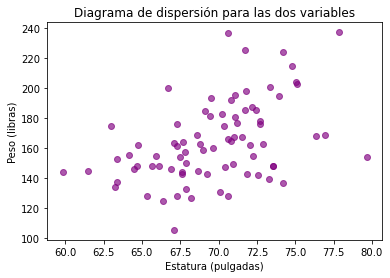

In [4]:
plt.scatter(x=x1, y=x2, color='purple', alpha=0.65)
plt.xlabel('Estatura (pulgadas)')
plt.ylabel('Peso (libras)')
plt.title('Diagrama de dispersión para las dos variables');

Es posible simular varias muestras de un tamaño especial. En el siguiente código vamos a crear simultáneamente 4 muestras cada una con 6 observaciones de la $N_2(\mu,\Sigma)$

In [5]:
x = np.random.multivariate_normal(mean=media, cov=sigma, size=(4, 6))
print("Las dimensiones de x son: ", x.shape, "\n")
print("El contenido de x es: \n", x)

Las dimensiones de x son:  (4, 6, 2) 

El contenido de x es: 
 [[[ 70.61421543 152.79106898]
  [ 73.89080915 179.83554562]
  [ 72.03810708 197.25519189]
  [ 67.40803414 150.17632226]
  [ 63.86466783 140.19392534]
  [ 71.95555521 172.1218719 ]]

 [[ 76.87512875 199.27373752]
  [ 70.25204954 165.51253361]
  [ 62.83470814 102.88498322]
  [ 70.04669544 215.01783734]
  [ 81.07813807 237.49168161]
  [ 68.88505171 158.4989896 ]]

 [[ 70.47417449 129.30702149]
  [ 75.67101711 207.616755  ]
  [ 75.78727234 182.65633059]
  [ 71.18727855 163.1912275 ]
  [ 77.51149433 216.29822152]
  [ 67.82395727 134.9426352 ]]

 [[ 67.73112009 175.37647586]
  [ 72.37084429 160.54870326]
  [ 72.96148459 179.908884  ]
  [ 71.28753024 164.85484063]
  [ 69.09995406 136.30612072]
  [ 71.45050778 186.6120705 ]]]


## Gráfico de contornos para una N2

Vamos a dibujar un gráfico de contornos para la distribución de interés. Para eso vamos a usar la función `multivariate_normal.pdf` de scipy.stats.

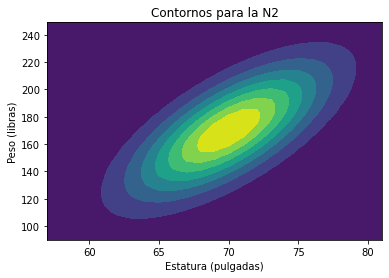

In [6]:
x, y = np.mgrid[57:82:1, 90:250:1]
pos = np.dstack((x, y))
z = multivariate_normal.pdf(pos, mean=media, cov=sigma)

plt.figure()
plt.contourf(x, y, z)
plt.xlabel('Estatura (pulgadas)')
plt.ylabel('Peso (libras)')
plt.title('Contornos para la N2')
plt.show()

Vamos a calcular la densidad para tres personas con las siguientes características: A=(65, 120), B=(70, 180) y C=(73, 190).

In [7]:
personas = [[65, 120], 
            [70, 180],
            [73, 190]] 

print(personas)

multivariate_normal.pdf(personas, mean=media, cov=sigma)

[[65, 120], [70, 180], [73, 190]]


array([0.00045599, 0.00144009, 0.0012395 ])

## Calculando verosimilitud ($L$) y log-verosimilitud ($l$)

Vamos a suponer que la muestra aleatoria está formada por las personas A, B y C. Queremos calcular $L$ y $l$ para un nuevo vector de medias y una nueva matriz de covarianzas.

In [8]:
new_media = [75, 160]            # mean vector
new_sigma = [[15, 100], 
             [100, 900]]         # variance matrix

# Verosimilitud
den = multivariate_normal.pdf(personas, mean=new_media, cov=new_sigma)
print("Las densidades serían ", den, "\n")

L = np.prod(den)
print("La verosimilitud es:", L, "\n")

# Log-verosimilitud
log_den = multivariate_normal.logpdf(personas, mean=new_media, cov=new_sigma)
print("Las log-densidades serían ", log_den, "\n")

l = np.sum(log_den)
print("La log-verosimilitud es:", l, "\n")

Las densidades serían  [2.09100836e-05 2.63478857e-06 4.21077374e-05] 

La verosimilitud es: 2.31986891426347e-15 

Las log-densidades serían  [-10.77527905 -12.84670762 -10.07527905] 

La log-verosimilitud es: -33.697265713301434 

